###**Mounting the drive**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


###**Importing the Libraries**

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

###**Unzipping and reading the data**

In [ ]:
!unzip "/content/drive/MyDrive/ASL_MNIST.zip" -d "/content"

Archive:  /content/drive/MyDrive/ASL_MNIST.zip
  inflating: /content/amer_sign2.png  
  inflating: /content/amer_sign3.png  
  inflating: /content/american_sign_language.PNG  
  inflating: /content/sign_mnist_test.csv  
  inflating: /content/sign_mnist_test/sign_mnist_test.csv  
  inflating: /content/sign_mnist_train.csv  
  inflating: /content/sign_mnist_train/sign_mnist_train.csv  


In [ ]:
train=pd.read_csv('/content/sign_mnist_train/sign_mnist_train.csv')
test=pd.read_csv('/content/sign_mnist_test/sign_mnist_test.csv')

In [ ]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,194,193,193,194,194,195,195,196,194,195,196,196,197,196,197,197,196,195,195,189,190,192,192,193,194,195,196,196,196,193,...,115,92,132,173,118,84,53,135,253,213,219,208,82,82,84,85,85,87,84,87,78,113,216,189,172,175,155,131,116,93,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,167,169,169,169,169,169,169,169,169,169,167,167,167,166,165,164,164,163,162,153,156,159,160,162,163,164,165,167,169,172,...,199,200,199,199,198,199,198,197,196,195,195,194,66,67,65,62,61,41,32,37,33,30,28,38,187,202,199,199,199,199,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,173,173,172,171,171,171,170,169,168,166,166,165,165,163,162,161,160,158,156,178,178,177,176,177,177,177,176,176,176,175,...,110,85,90,166,205,207,205,203,202,201,200,198,217,217,217,218,218,211,203,200,189,171,157,145,136,129,128,125,101,77,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,190,191,193,192,191,191,191,191,190,190,189,187,186,184,183,182,181,179,177,179,182,185,187,189,190,192,192,192,192,194,...,190,173,140,80,28,60,70,61,61,78,100,86,136,135,135,135,132,132,136,136,137,144,103,120,197,200,195,196,170,149,119,56,27,58,102,79,47,64,87,93


###**Data Analysis**

In [ ]:
train.shape

(27455, 785)

In [ ]:
train['label'].value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [ ]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [ ]:
Train = np.array(train, dtype = 'float32')
Test = np.array(test, dtype='float32')

In [ ]:
Train

array([[  3., 107., 118., ..., 204., 203., 202.],
       [  6., 155., 157., ..., 103., 135., 149.],
       [  2., 187., 188., ..., 195., 194., 195.],
       ...,
       [ 18., 174., 174., ..., 202., 200., 200.],
       [ 17., 177., 181., ...,  64.,  87.,  93.],
       [ 23., 179., 180., ..., 205., 209., 215.]], dtype=float32)

###**Visualising an image**

(-0.5, 27.5, 27.5, -0.5)

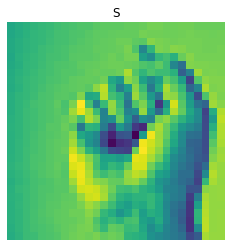

In [ ]:
import random
import matplotlib.pyplot as plt

num = random.randint(1,27455)
plt.imshow(Train[num,1:].reshape((28,28)))  
label_index = train["label"][num]
plt.title(f"{class_names[label_index]}")
plt.axis('off')

In [ ]:
X_train = Train[:, 1:] / 255
y_train = Train[:, 0]

X_test = Test[:, 1:] / 255
y_test = Test[:,0]

###**Splitting the dataset**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2)


In [ ]:
print("Shape of training data set -> X :"+str(x_train.shape))
print("Shape of training data set -> Y :"+str(y_train.shape))
print("Shape of validation data set -> X :"+str(x_validate.shape))
print("Shape of validation data set -> X :"+str(y_validate.shape))

Shape of training data set -> X :(21964, 784)
Shape of training data set -> Y :(21964,)
Shape of validation data set -> X :(5491, 784)
Shape of validation data set -> X :(5491,)


In [ ]:
x_train

array([[0.73333335, 0.7294118 , 0.73333335, ..., 0.7019608 , 0.69803923,
        0.627451  ],
       [0.6117647 , 0.6156863 , 0.627451  , ..., 0.14901961, 0.17254902,
        0.1882353 ],
       [0.5647059 , 0.59607846, 0.6392157 , ..., 0.01960784, 0.04313726,
        0.07843138],
       ...,
       [0.62352943, 0.627451  , 0.6313726 , ..., 0.7647059 , 0.7607843 ,
        0.75686276],
       [0.27058825, 0.30980393, 0.34117648, ..., 0.7019608 , 0.7019608 ,
        0.7058824 ],
       [0.6392157 , 0.64705884, 0.65882355, ..., 0.7294118 , 0.7254902 ,
        0.72156864]], dtype=float32)

In [ ]:
y_train

array([ 3.,  1., 23., ..., 23., 10., 23.], dtype=float32)

In [ ]:
x_validate

array([[0.79607844, 0.79607844, 0.7921569 , ..., 0.8784314 , 0.8666667 ,
        0.85882354],
       [0.10588235, 0.16862746, 0.2509804 , ..., 0.6745098 , 0.6784314 ,
        0.6784314 ],
       [0.67058825, 0.6784314 , 0.68235296, ..., 0.7411765 , 0.7607843 ,
        0.7647059 ],
       ...,
       [0.49411765, 0.5058824 , 0.5176471 , ..., 0.80784315, 0.8039216 ,
        0.79607844],
       [0.2901961 , 0.30980393, 0.3372549 , ..., 0.7529412 , 0.7529412 ,
        0.7529412 ],
       [0.6       , 0.6       , 0.6039216 , ..., 0.654902  , 0.6509804 ,
        0.64705884]], dtype=float32)

In [ ]:
y_validate

array([ 2., 22.,  8., ..., 10., 13.,  2.], dtype=float32)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
x_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
x_validate = x_validate.reshape(x_validate.shape[0], *(28, 28, 1))

In [ ]:
x_train

array([[[[0.73333335],
         [0.7294118 ],
         [0.73333335],
         ...,
         [0.6745098 ],
         [0.67058825],
         [0.6627451 ]],

        [[0.73333335],
         [0.7372549 ],
         [0.7372549 ],
         ...,
         [0.6745098 ],
         [0.6745098 ],
         [0.67058825]],

        [[0.7411765 ],
         [0.7411765 ],
         [0.74509805],
         ...,
         [0.6784314 ],
         [0.6745098 ],
         [0.67058825]],

        ...,

        [[0.8235294 ],
         [0.83137256],
         [0.8392157 ],
         ...,
         [0.7647059 ],
         [0.7607843 ],
         [0.7490196 ]],

        [[0.8235294 ],
         [0.83137256],
         [0.84313726],
         ...,
         [0.7607843 ],
         [0.75686276],
         [0.7529412 ]],

        [[0.8235294 ],
         [0.827451  ],
         [0.8156863 ],
         ...,
         [0.7019608 ],
         [0.69803923],
         [0.627451  ]]],


       [[[0.6117647 ],
         [0.6156863 ],
         [0.62

###**Define the Model**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

#Defining the Convolutional Neural Network
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(26, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

###**Compiling and training the model**

In [ ]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

history = model.fit(x_train, y_train, batch_size = 32, epochs = 50, verbose = 1, validation_data = (x_validate, y_validate))

Epoch 1/50
687/687 [==============================] - 35s 8ms/step - loss: 2.8487 - accuracy: 0.1323 - val_loss: 0.7941 - val_accuracy: 0.7631
Epoch 2/50
687/687 [==============================] - 5s 7ms/step - loss: 0.8738 - accuracy: 0.7014 - val_loss: 0.2391 - val_accuracy: 0.9406
Epoch 3/50
687/687 [==============================] - 5s 7ms/step - loss: 0.4684 - accuracy: 0.8380 - val_loss: 0.0935 - val_accuracy: 0.9836
Epoch 4/50
687/687 [==============================] - 5s 7ms/step - loss: 0.2965 - accuracy: 0.8991 - val_loss: 0.0596 - val_accuracy: 0.9854
Epoch 5/50
687/687 [==============================] - 5s 7ms/step - loss: 0.2068 - accuracy: 0.9309 - val_loss: 0.0328 - val_accuracy: 0.9933
Epoch 6/50
687/687 [==============================] - 5s 7ms/step - loss: 0.1548 - accuracy: 0.9495 - val_loss: 0.0129 - val_accuracy: 0.9980
Epoch 7/50
687/687 [==============================] - 5s 7ms/step - loss: 0.1222 - accuracy: 0.9579 - val_loss: 0.0089 - val_accuracy: 0.9989
Epoch

###**Plotting the Loss and Accuracy graphs**

Text(0.5, 1.0, 'Accuracy')

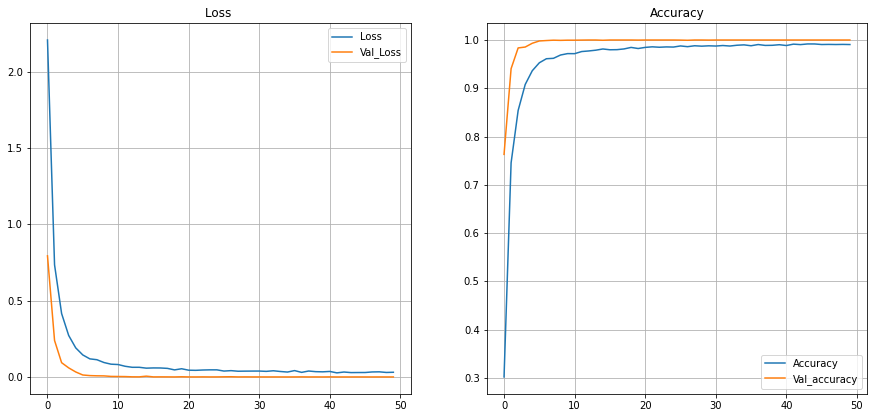

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.grid()
plt.title('Loss ')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy')

###**Testing the model**

In [ ]:
pred = model.predict(x_test)


In [ ]:
pred

array([[1.04818565e-17, 6.55271464e-14, 1.39737075e-08, ...,
        2.38748115e-08, 8.07769000e-18, 2.01271406e-18],
       [4.90987179e-22, 2.09404941e-11, 1.70182273e-23, ...,
        3.09017592e-21, 1.02648368e-21, 1.98022662e-32],
       [1.17273582e-21, 5.38802207e-18, 7.80094584e-20, ...,
        1.70951154e-15, 5.08723480e-11, 7.13842807e-19],
       ...,
       [8.29081037e-16, 6.69432565e-11, 1.65464416e-01, ...,
        1.00751470e-10, 2.53133129e-18, 6.35998328e-17],
       [4.94399010e-12, 5.35244276e-19, 1.01324993e-18, ...,
        1.45350284e-25, 6.92024762e-31, 1.94284428e-32],
       [8.31344557e-18, 3.43384067e-13, 8.56505998e-04, ...,
        8.61136141e-13, 2.93240729e-20, 1.41294999e-19]], dtype=float32)

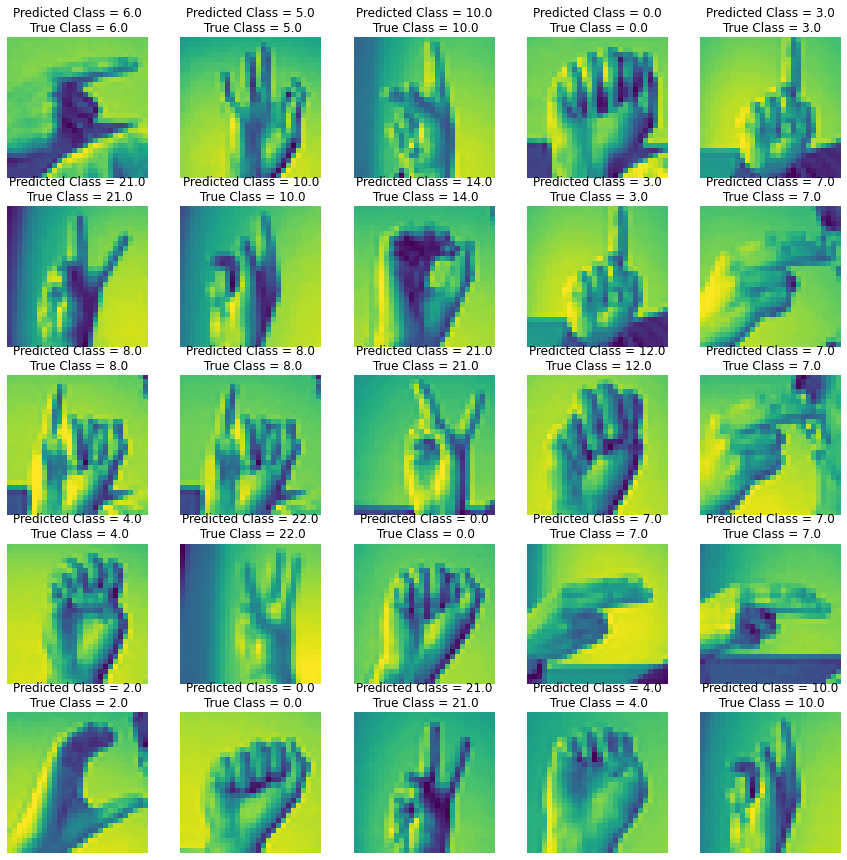

In [ ]:
fig, axes = plt.subplots(5,5, figsize = (15,15))
axes = axes.ravel()

for i in np.arange(0, 25):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Predicted Class = {np.argmax(pred[i]):0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')



In [ ]:
predicted_class=[]
for i in pred:
  predicted_class.append(np.argmax(i))
predicted_class


[6,
 5,
 10,
 0,
 3,
 21,
 10,
 14,
 3,
 7,
 8,
 8,
 21,
 12,
 7,
 4,
 22,
 0,
 7,
 7,
 2,
 0,
 21,
 4,
 10,
 15,
 2,
 15,
 7,
 1,
 7,
 8,
 13,
 19,
 3,
 21,
 13,
 3,
 18,
 14,
 15,
 10,
 8,
 15,
 14,
 5,
 20,
 4,
 11,
 13,
 20,
 22,
 3,
 5,
 16,
 16,
 21,
 4,
 6,
 22,
 10,
 13,
 11,
 22,
 2,
 10,
 1,
 4,
 18,
 4,
 20,
 6,
 15,
 4,
 3,
 20,
 15,
 11,
 2,
 2,
 17,
 14,
 7,
 21,
 23,
 7,
 12,
 11,
 8,
 14,
 2,
 1,
 7,
 23,
 8,
 5,
 0,
 0,
 19,
 21,
 8,
 4,
 2,
 20,
 16,
 1,
 15,
 14,
 2,
 6,
 12,
 5,
 0,
 24,
 2,
 11,
 14,
 24,
 16,
 10,
 4,
 8,
 8,
 12,
 12,
 8,
 6,
 21,
 4,
 15,
 11,
 21,
 2,
 15,
 23,
 23,
 4,
 21,
 22,
 3,
 15,
 18,
 7,
 20,
 21,
 6,
 1,
 6,
 10,
 5,
 4,
 21,
 3,
 21,
 14,
 23,
 2,
 10,
 7,
 5,
 2,
 21,
 8,
 4,
 18,
 23,
 13,
 3,
 6,
 8,
 13,
 15,
 4,
 16,
 3,
 17,
 18,
 7,
 21,
 1,
 13,
 16,
 24,
 23,
 2,
 7,
 8,
 24,
 1,
 12,
 23,
 3,
 0,
 15,
 13,
 15,
 13,
 5,
 11,
 1,
 7,
 6,
 8,
 1,
 23,
 0,
 8,
 23,
 20,
 2,
 3,
 7,
 14,
 12,
 18,
 6,
 3,
 15,
 4,
 10,
 4,
 15

In [ ]:
from sklearn.metrics import accuracy_score
print("Test accuracy : ",accuracy_score(predicted_class,y_test))

Test accuracy :  0.9461795872838817


###**Save the model architecture and weights**

In [ ]:
#to save the weights in the model as a HDF file

model.save_weights('ASL_MNIST_weights.h5')

In [ ]:
#to save the architecture of the model as a json file

with open('ASL_MNIST_model_architecture.json','w') as f:
    f.write(model.to_json())